In [1]:
from itertools import *
import numpy as np
from pspy import *
from math import pi
from matplotlib import pyplot as plt
from functions.likelihood_functions import *
from cobaya.run import run

In [9]:
date_float = '0618_0500'  # "0618_0500" "0606_0552" "0613_1815_beta0.1_beta0.2_beta0.3_beta0.4_beta0.5_beta0.7_beta1.0"
spec_keys_pspy = ["TT", "TE", "TB", "ET", "BT", "EE", "EB", "BE", "BB"]

# All spectra are stored with keyslike :
# T1431E2172 for TE 143GHzhm1x217GHzhm2
# 9(keys) * 9(band combinaitions) * 4(hm combinaitions) = 324 keys in data dict
data = {}
for BAND_1, BAND_2 in product(["100", "143", "217"], repeat=2):  # 
    for hm_1, hm_2 in product(["1", "2"], repeat=2):
        lb, current_spectra = so_spectra.read_ps(
            "data/spectra/maison/Dls_%shm%sx%shm%s_%s.dat"
            % (BAND_1, hm_1, BAND_2, hm_2, date_float),
            spectra=spec_keys_pspy,
        )
        for XY in spec_keys_pspy:
            X, Y = XY[0], XY[1]
            data[X + BAND_1 + hm_1 + Y + BAND_2 + hm_2] = (
                current_spectra[XY] * 2 * pi / (lb * (lb + 1))
            )

splits = [ "1001", "1002", "1431", "1432", "2171", "2172"]  # "1001", "1002",
# splits = [ "2171", "2172", "2171", "2172"]  # "1001", "1002",
beta = 1* pi / 180

method='product'

obs_EB, model_EB, error_EB, chi2_list = get_chi2_beta(
    lb,
    data,
    splits,
    beta,
    lmin=10,
    lmax=2500,
    binning_file="data/spectra/maison/binning/binning%s.dat" % (date_float),
    method = method,
    date_float=date_float
)

In [12]:
mean_EB, mean_model_EB, error_EB = get_mean_EB(lb, data, splits, date_float, beta_deg=0.3)

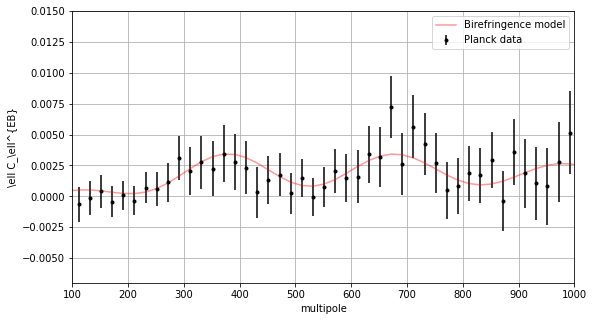

In [13]:
plt.figure(1, figsize=(9, 5))
plt.errorbar(lb, mean_EB * lb, error_EB * lb / np.sqrt(0.5), linestyle='none', marker='.', color='black', label='Planck data')
plt.plot(lb, mean_model_EB * lb, color='red', alpha=0.4, label='Birefringence model')
plt.grid()
plt.ylabel("\ell C_\ell^{EB}")
plt.ylim(-0.7e-2, 1.5e-2)
plt.xlabel('multipole')
plt.xlim(100, 1000)
plt.legend()

In [14]:
def loglike(x_deg):
    loglike_beta = get_loglike_beta(
        lb,
        data,
        splits,
        x_deg * pi / 180,
        lmin=100,
        lmax=1000,
        binning_file="data/spectra/maison/binning/binning%s.dat" % (date_float),
        method = method,
        date_float=date_float
    )
    return loglike_beta

Text(0, 0.5, 'Likelihood')

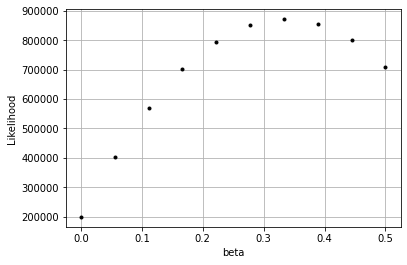

In [15]:
for beta_deg_likelihood in np.linspace(0.0, 0.5, 10):    # -0.1, 1.6, 15
    plt.plot(beta_deg_likelihood, loglike(beta_deg_likelihood), marker='.', color='black')
plt.grid()
plt.xlabel('beta')
plt.ylabel('Likelihood')

In [16]:
info = {}
info["likelihood"] = { "my_like": loglike}
info["params"] = { "x_deg": {  "prior": {  "min": -0.5,  "max": 0.5},  "ref": 0.28,  "proposal": 0.005, "latex": r"\beta"}}
info["sampler"] = { "mcmc": {  "max_tries": 1000,  "Rminus1_stop": 0.1}}
info["output"] = "results"
info["force"] = True
info["debug"] = False

In [17]:
updated_info, sampler = run(info)

[output] Output to be read-from/written-into folder '.', with prefix 'results'
[output] Found existing info files with the requested output prefix: 'results'
[output] Will delete previous products ('force' was requested).
[my_like] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {my_like: 3.1}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: x_deg:0.28
[mcmc] Sampling!
[mcmc] Progress @ 2024-06-24 05:16:10 : 1 steps taken, and 0 accepted.
[mcmc] Progress @ 2024-06-24 05:17:10 : 176 steps taken, and 12 accepted.
[mcmc] Progress @ 2024-06-24 05:18:10 : 353 steps taken, and 21 accepted.
[mcmc] Progress @ 2024-06-24 05:19:10 : 527 steps taken, and 24 accepted.
[mcmc] Progress @ 2024-06-24 05:20:11 : 706 steps taken, and 31 accep

In [32]:
print(sampler)
print(updated_info)

mcmc
{'sampler': {'mcmc': {'burn_in': 0, 'max_tries': 1000, 'covmat': None, 'covmat_params': None, 'proposal_scale': 2.4, 'output_every': '60s', 'learn_every': '40d', 'learn_proposal': True, 'learn_proposal_Rminus1_max': 2.0, 'learn_proposal_Rminus1_max_early': 30.0, 'learn_proposal_Rminus1_min': 0.0, 'max_samples': inf, 'Rminus1_stop': 0.1, 'Rminus1_cl_stop': 0.2, 'Rminus1_cl_level': 0.95, 'Rminus1_single_split': 4, 'measure_speeds': True, 'oversample_power': 0.4, 'oversample_thin': True, 'drag': False, 'blocking': [(1, ['x_deg'])], 'callback_function': None, 'callback_every': None, 'seed': None, 'check_every': None, 'oversample': None, 'drag_limits': None, 'fallback_covmat_scale': 4, 'version': '3.1.1'}}, 'likelihood': {'my_like': {'type': [], 'speed': -1, 'stop_at_error': False, 'version': None, 'external': <function loglike at 0x7fa645285040>, 'input_params': ['x_deg'], 'output_params': []}}, 'params': {'x_deg': {'prior': {'min': -0.5, 'max': 0.5}, 'ref': 0.28, 'proposal': 0.005, '